## `Imports`

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LassoCV, LogisticRegression, RidgeCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.math import confusion_matrix
from xgboost import XGBClassifier

In [4]:
# setting a random seed
np.random.seed(24)

## `DataFrame`

In [5]:
X_train = pd.read_csv('../data/X_train_b_cleaned.csv')
X_test = pd.read_csv('../data/X_test_b_cleaned.csv')
y_train = np.load('../data/y_train.npy')
y_test = np.load('../data/y_test.npy')

In [6]:
print(f'Number of features: {len(X_train.columns)}')

Number of features: 1095


## `Modeling`

#### RFC

In [16]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('rfc', RandomForestClassifier(random_state=24))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(1.0, 0.8816029143897997)

In [ ]:
with open('../models/rfc_u2000.pkl', 'wb') as pickle_out:
    pickle.dump(pipe, pickle_out)

#### ETC

In [17]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('etc', ExtraTreesClassifier(random_state=24))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(1.0, 0.8809957498482088)

#### GBC

In [18]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('gbc', GradientBoostingClassifier())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.8930595422094649, 0.8736545785726113)

#### ABC

In [19]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('abc', AdaBoostClassifier())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.8817251784794289, 0.8816029143897997)

#### Log Reg (Ridge)

In [20]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=4000, random_state=24))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.8868771619930816, 0.87117072362974)

#### Log Reg (Lasso) 

In [ ]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l1', max_iter=4000, random_state=24, solver='liblinear'))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

**Note**: Took too long; not worth it

#### XGBC

In [21]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('xbg', XGBClassifier(use_label_encoder=False))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

[16:38:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.9031979097666888, 0.8801677982005851)

#### KNN

In [22]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knc', KNeighborsClassifier())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.8825899757120778, 0.8625048297179445)

#### NN

In [23]:
from tensorflow.random import set_seed
set_seed(24)

In [24]:
# scale, fit & transform data
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [25]:
model = Sequential()

model.add(Dense(units=400, input_shape=X_train_sc[0].shape, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=12, activation='softmax'))

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [26]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=40, batch_size=32, callbacks=[early_stop])

Epoch 1/40
1699/1699 [==============================] - 11s 6ms/step - loss: 0.5231 - acc: 0.8742 - val_loss: 0.4965 - val_acc: 0.8803
Epoch 2/40
1699/1699 [==============================] - 9s 5ms/step - loss: 0.4639 - acc: 0.8810 - val_loss: 0.4601 - val_acc: 0.8811
Epoch 3/40
1699/1699 [==============================] - 9s 5ms/step - loss: 0.4557 - acc: 0.8813 - val_loss: 0.4610 - val_acc: 0.8814
Epoch 4/40
1699/1699 [==============================] - 9s 5ms/step - loss: 0.4483 - acc: 0.8814 - val_loss: 0.4603 - val_acc: 0.8814
Epoch 5/40
1699/1699 [==============================] - 9s 5ms/step - loss: 0.4461 - acc: 0.8814 - val_loss: 0.4583 - val_acc: 0.8816
Epoch 6/40
1699/1699 [==============================] - 9s 5ms/step - loss: 0.4407 - acc: 0.8815 - val_loss: 0.4634 - val_acc: 0.8815
Epoch 7/40
1699/1699 [==============================] - 9s 5ms/step - loss: 0.4359 - acc: 0.8814 - val_loss: 0.4754 - val_acc: 0.8814
Epoch 8/40
1699/1699 [==============================] - 9s 5m

In [11]:
# saving the model
model.save('../models/nn_baseline.h5')

#### Model df

In [33]:
model_df = pd.DataFrame()
model_df['Model'] = ['RFC', 'ETC', 'GBC', 'ABC', 'Log Reg', 'XGBC', 'KNN', 'NN']
model_df['Train'] = [1.0, 1.0, .8930, .8817, .8868, .9031, .8825, .8821]
model_df['Test'] = [.8816, .8809, .8736, .8816, .8711, .8801, .8625, .8812]

In [38]:
model_df.sort_values(by='Test', ascending=False)

,Model,Train,Test
0,RFC,1.0000,0.8816
3,ABC,0.8817,0.8816
7,NN,0.8821,0.8812
1,ETC,1.0000,0.8809
5,XGBC,0.9031,0.8801
2,GBC,0.8930,0.8736
4,Log Reg,0.8868,0.8711
6,KNN,0.8825,0.8625


In [39]:
model_df.to_csv('../data/model_df_b.csv')

**Notes**:
* RFC, ABC, NN

---

## `Optimization`

#### RFC

In [14]:
# original rfc pipe
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('rfc', RandomForestClassifier(random_state=24))
])

In [16]:
# rfc random search parameters
rs_params = {'ss__with_mean': [True, False],
             'ss__with_std' : [True, False],
             'rfc__n_estimators': [100, 300, 500, 800, 1200],
             'rfc__criterion': ['gini', 'entropy'],
             'rfc__max_depth': [5, 8, 15, 25, 30, None],
             'rfc__min_samples_split': [2, 5, 10, 15, 100],
             'rfc__min_samples_leaf': [1, 2, 5, 10],
             'rfc__n_jobs': [-1]
}

In [17]:
# instantiating rfc rs
rfc_rs = RandomizedSearchCV(pipe, rs_params, cv=5, verbose=1)

In [18]:
# fit random search
rfc_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ss', StandardScaler()),
                                             ('rfc',
                                              RandomForestClassifier(random_state=24))]),
                   param_distributions={'rfc__criterion': ['gini', 'entropy'],
                                        'rfc__max_depth': [5, 8, 15, 25, 30,
                                                           None],
                                        'rfc__min_samples_leaf': [1, 2, 5, 10],
                                        'rfc__min_samples_split': [2, 5, 10, 15,
                                                                   100],
                                        'rfc__n_estimators': [100, 300, 500,
                                                              800, 1200],
                                        'rfc__n_jobs': [-1],
                                        'ss__with_mean': [True, False],
                     

In [19]:
# best search score
rfc_rs.best_score_

0.8817251785777313

In [20]:
# best search parameters
rfc_rs.best_params_

{'ss__with_std': True,
 'ss__with_mean': False,
 'rfc__n_jobs': -1,
 'rfc__n_estimators': 500,
 'rfc__min_samples_split': 2,
 'rfc__min_samples_leaf': 5,
 'rfc__max_depth': 30,
 'rfc__criterion': 'gini'}

In [21]:
# best search score for test set
rfc_rs.score(X_test, y_test)

0.8816581111663079

In [ ]:
# df for search
pd.DataFrame(rfc_rs.cv_results_).sort_values('rank_test_score')

#### ABC

In [24]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('abc', AdaBoostClassifier(random_state=24))
])

In [25]:
abc_params = {'ss__with_mean': [True, False],
              'ss__with_std' : [True, False],
              'abc__n_estimators': [300, 500, 700],
              'abc__learning_rate': [.01, .1, 1]
}

In [26]:
abc_rs = RandomizedSearchCV(pipe, abc_params, cv=5, verbose=1)

In [27]:
abc_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ss', StandardScaler()),
                                             ('abc', AdaBoostClassifier())]),
                   param_distributions={'abc__learning_rate': [0.01, 0.1, 1],
                                        'abc__n_estimators': [300, 500, 700],
                                        'ss__with_mean': [True, False],
                                        'ss__with_std': [True, False]},
                   verbose=1)

In [28]:
abc_rs.best_score_

0.8817251785777313

In [29]:
abc_rs.best_params_

{'ss__with_std': True,
 'ss__with_mean': False,
 'abc__n_estimators': 300,
 'abc__learning_rate': 0.01}

In [30]:
abc_rs.score(X_test, y_test)

0.8816581111663079

In [31]:
pd.DataFrame(abc_rs.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ss__with_std,param_ss__with_mean,param_abc__n_estimators,param_abc__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,169.337940,4.209746,11.943587,0.957877,True,False,300,0.01,"{'ss__with_std': True, 'ss__with_mean': False,...",0.881785,0.881785,0.881601,0.881682,0.881774,0.881725,0.000073,1
6,390.474779,15.468106,26.736226,0.828371,False,False,700,0.01,"{'ss__with_std': False, 'ss__with_mean': False...",0.881785,0.881785,0.881601,0.881682,0.881774,0.881725,0.000073,1
5,169.647327,7.940762,11.727892,0.595673,True,True,300,0.1,"{'ss__with_std': True, 'ss__with_mean': True, ...",0.874057,0.881785,0.877461,0.881682,0.876070,0.878211,0.003073,3
0,268.850446,14.464469,19.034174,1.105982,True,False,500,0.1,"{'ss__with_std': True, 'ss__with_mean': False,...",0.872769,0.881785,0.874885,0.881682,0.875886,0.877401,0.003678,4
1,302.219648,16.901469,21.628043,2.585086,False,False,500,0.1,"{'ss__with_std': False, 'ss__with_mean': False...",0.872769,0.881785,0.874885,0.881682,0.875886,0.877401,0.003678,4


#### NN

In [7]:
from tensorflow.random import set_seed
set_seed(24)

In [8]:
# scale, fit & transform data
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [9]:
def model_func(layer_one, layer_two, layer_three):
    model = Sequential()
    model.add(Dense(units=400, input_shape=X_train_sc[0].shape, activation='relu'))
    model.add(Dropout(.25))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(.20))
    model.add(Dense(units=12, activation='softmax'))

    early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['mse', 'mae', 'acc',])
    return model

In [10]:
nn = KerasClassifier(model=model_func, batch_size=32, verbose=0, layer_one=32, layer_two=32, layer_three=32)

In [11]:
nn_params = {
    'layer_one': [100, 200, 400],
    'layer_two': [100, 200, 300],
    'layer_three': [32, 64, 128],
    'epochs': [40, 50]
}

In [12]:
nn_rs = RandomizedSearchCV(nn, nn_params, cv=5, n_jobs=-1)

In [13]:
nn_rs.fit(X_train_sc, y_train)

RandomizedSearchCV(cv=5,
                   estimator=KerasClassifier(batch_size=32, layer_one=32, layer_three=32, layer_two=32, model=<function model_func at 0x000002BD76C10550>, verbose=0),
                   n_jobs=-1,
                   param_distributions={'epochs': [40, 50],
                                        'layer_one': [100, 200, 400],
                                        'layer_three': [32, 64, 128],
                                        'layer_two': [100, 200, 300]})

In [14]:
nn_rs.best_score_

0.8612644081227275

In [15]:
nn_rs.best_params_

{'layer_two': 300, 'layer_three': 128, 'layer_one': 100, 'epochs': 40}

In [17]:
nn_rs.score(X_test_sc, y_test)

0.8609041231992052

In [18]:
pd.DataFrame(nn_rs.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_layer_two,param_layer_three,param_layer_one,param_epochs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,776.955180,269.779400,5.484676,3.794801,300,128,100,40,"{'layer_two': 300, 'layer_three': 128, 'layer_...",0.860166,0.867341,0.858234,0.861441,0.859141,0.861264,0.003221,1
5,1050.406410,3.726158,5.957875,1.581117,200,64,400,40,"{'layer_two': 200, 'layer_three': 64, 'layer_o...",0.865225,0.855198,0.860994,0.862637,0.860705,0.860952,0.003295,2
7,967.642342,10.787216,4.592444,1.692376,300,64,100,40,"{'layer_two': 300, 'layer_three': 64, 'layer_o...",0.858050,0.859522,0.862190,0.863741,0.856841,0.860068,0.002560,3
3,1101.000576,16.496899,10.735894,4.354181,100,128,400,40,"{'layer_two': 100, 'layer_three': 128, 'layer_...",0.855014,0.861822,0.861454,0.859877,0.859325,0.859498,0.002429,4
2,1337.949208,3.672707,4.419248,1.558427,300,128,400,50,"{'layer_two': 300, 'layer_three': 128, 'layer_...",0.865041,0.855290,0.864029,0.856289,0.849664,0.858063,0.005756,5


In [68]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=40, batch_size=32, callbacks=[early_stop])

Epoch 1/40
1699/1699 [==============================] - 10s 6ms/step - loss: 0.5237 - mse: 63.3639 - mae: 7.7426 - acc: 0.8754 - val_loss: 0.4718 - val_mse: 63.3599 - val_mae: 7.7422 - val_acc: 0.8808
Epoch 2/40
1699/1699 [==============================] - 9s 6ms/step - loss: 0.4662 - mse: 63.3649 - mae: 7.7426 - acc: 0.8810 - val_loss: 0.4568 - val_mse: 63.3619 - val_mae: 7.7422 - val_acc: 0.8814
Epoch 3/40
1699/1699 [==============================] - 9s 5ms/step - loss: 0.4550 - mse: 63.3652 - mae: 7.7426 - acc: 0.8812 - val_loss: 0.4593 - val_mse: 63.3621 - val_mae: 7.7422 - val_acc: 0.8814
Epoch 4/40
1699/1699 [==============================] - 9s 6ms/step - loss: 0.4503 - mse: 63.3653 - mae: 7.7426 - acc: 0.8813 - val_loss: 0.4667 - val_mse: 63.3612 - val_mae: 7.7422 - val_acc: 0.8814
Epoch 5/40
1699/1699 [==============================] - 9s 6ms/step - loss: 0.4465 - mse: 63.3655 - mae: 7.7426 - acc: 0.8814 - val_loss: 0.4717 - val_mse: 63.3634 - val_mae: 7.7422 - val_acc: 0.8811

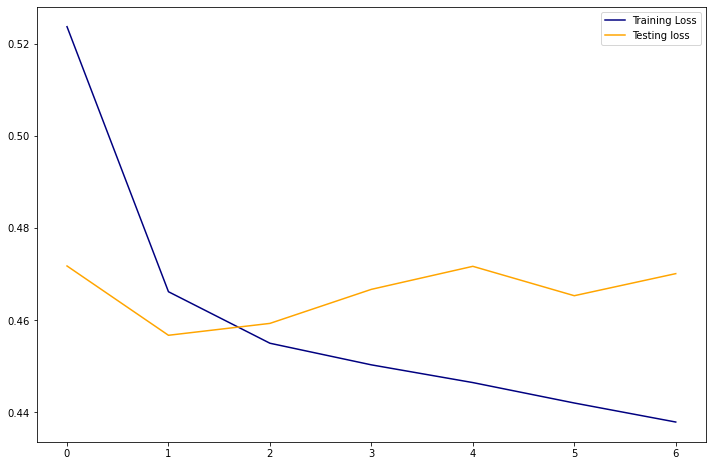

In [73]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12,8))
plt.plot(train_loss, label='Training Loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='orange')
plt.legend();

In [130]:
model.evaluate(X_test_sc, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.3979 - acc: 0.8978


[0.39788171648979187, 0.897777795791626]

In [131]:
y_preds = model.predict(X_test_sc)

In [133]:
y_preds = np.round(y_preds, decimals=0)

In [134]:
y_preds = y_preds.astype(int)

In [135]:
y_preds_df = pd.DataFrame(y_preds)

In [137]:
y_preds_df.sum()

0     1473
1     1459
2     1507
3     1457
4     1300
5     1413
6     1397
7     1503
8     1517
9     1495
10     846
11    1203
dtype: int64

In [139]:
y_true = pd.Series(y_test)

72000

In [140]:
y_true.value_counts()

2     1500
0     1500
8     1500
7     1500
3     1500
4     1500
11    1500
10    1500
6     1500
1     1500
9     1500
5     1500
dtype: int64

In [497]:
y_preds.shape

(18117, 12)

In [450]:
len(y_test)

18117

In [495]:
classification_report(y_test, y_preds)

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [432]:
confusion_matrix(labels=y_test, predictions=y_preds, num_classes=12)

InvalidArgumentError: Shapes of all inputs must match: values[0].shape = [18117] != values[1].shape = [18117,12] [Op:Pack] name: stack

In [413]:
# creating confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap='Oranges')

plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Actual')

ValueError: Mix type of y not allowed, got types {'multiclass', 'continuous-multioutput'}

In [146]:
ohe_df = pd.read_csv('../data/ohe_train_sess.csv')

In [151]:
ohe_df.shape

(72465, 1873)